# Carga de datos

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd

directorioImagenes = 'datos/imagenes'
imagenes = glob.glob(os.path.join(directorioImagenes, '*.pgm'))

print('Se encontraron ' + str(len(imagenes)) + ' imagenes')


Se encontraron 20 imagenes


In [3]:
def calcularMetricas(pred, gt):
    TP = np.sum((pred == 255) & (gt == 255))
    TN = np.sum((pred == 0)   & (gt == 0))
    FP = np.sum((pred == 255) & (gt == 0))
    FN = np.sum((pred == 0)   & (gt == 255))
    
    total = TP + TN + FP + FN

    accuracy = (TP + TN) / total if total else 0
    precision = TP / (TP + FP) if (TP + FP) else 0
    recall = TP / (TP + FN) if (TP + FN) else 0
    specificity = TN / (TN + FP) if (TN + FP) else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) else 0
    
    return accuracy, recall, specificity, precision, f1_score

## Umbralización Adaptativa

In [4]:
maxValue = 255
metodoAdaptativo = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
thresholdType = cv2.THRESH_BINARY_INV
blockSize = 31
C = 5

In [5]:
resultados = []
kernelSize = (5, 5)
resultadosVisuales = []

for imagen in imagenes:
    img = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print('Error al cargar la imagen ' + imagen)
        continue
    
    blurred = cv2.GaussianBlur(img, kernelSize, 0)
    adaptativo = cv2.adaptiveThreshold(blurred, maxValue, metodoAdaptativo, thresholdType, blockSize, C)
    filename = os.path.basename(imagen)
    gt_name = filename
    gt_path = os.path.join('datos', 'etiquetas', gt_name)
    gt = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
    if gt is None:
        print('Error al cargar la imagen ' + gt_path)
        continue
    
    accuracy, recall, specificity, precision, f1_score = calcularMetricas(adaptativo, gt)
    
    resultadosVisuales.append((filename, img, adaptativo, gt))
    
    resultados.append({
        'Imagen': filename,
        'Accuracy': accuracy,
        'Recall': recall,
        'Specificity': specificity,
        'Precision': precision,
        'F1 Score': f1_score
    })

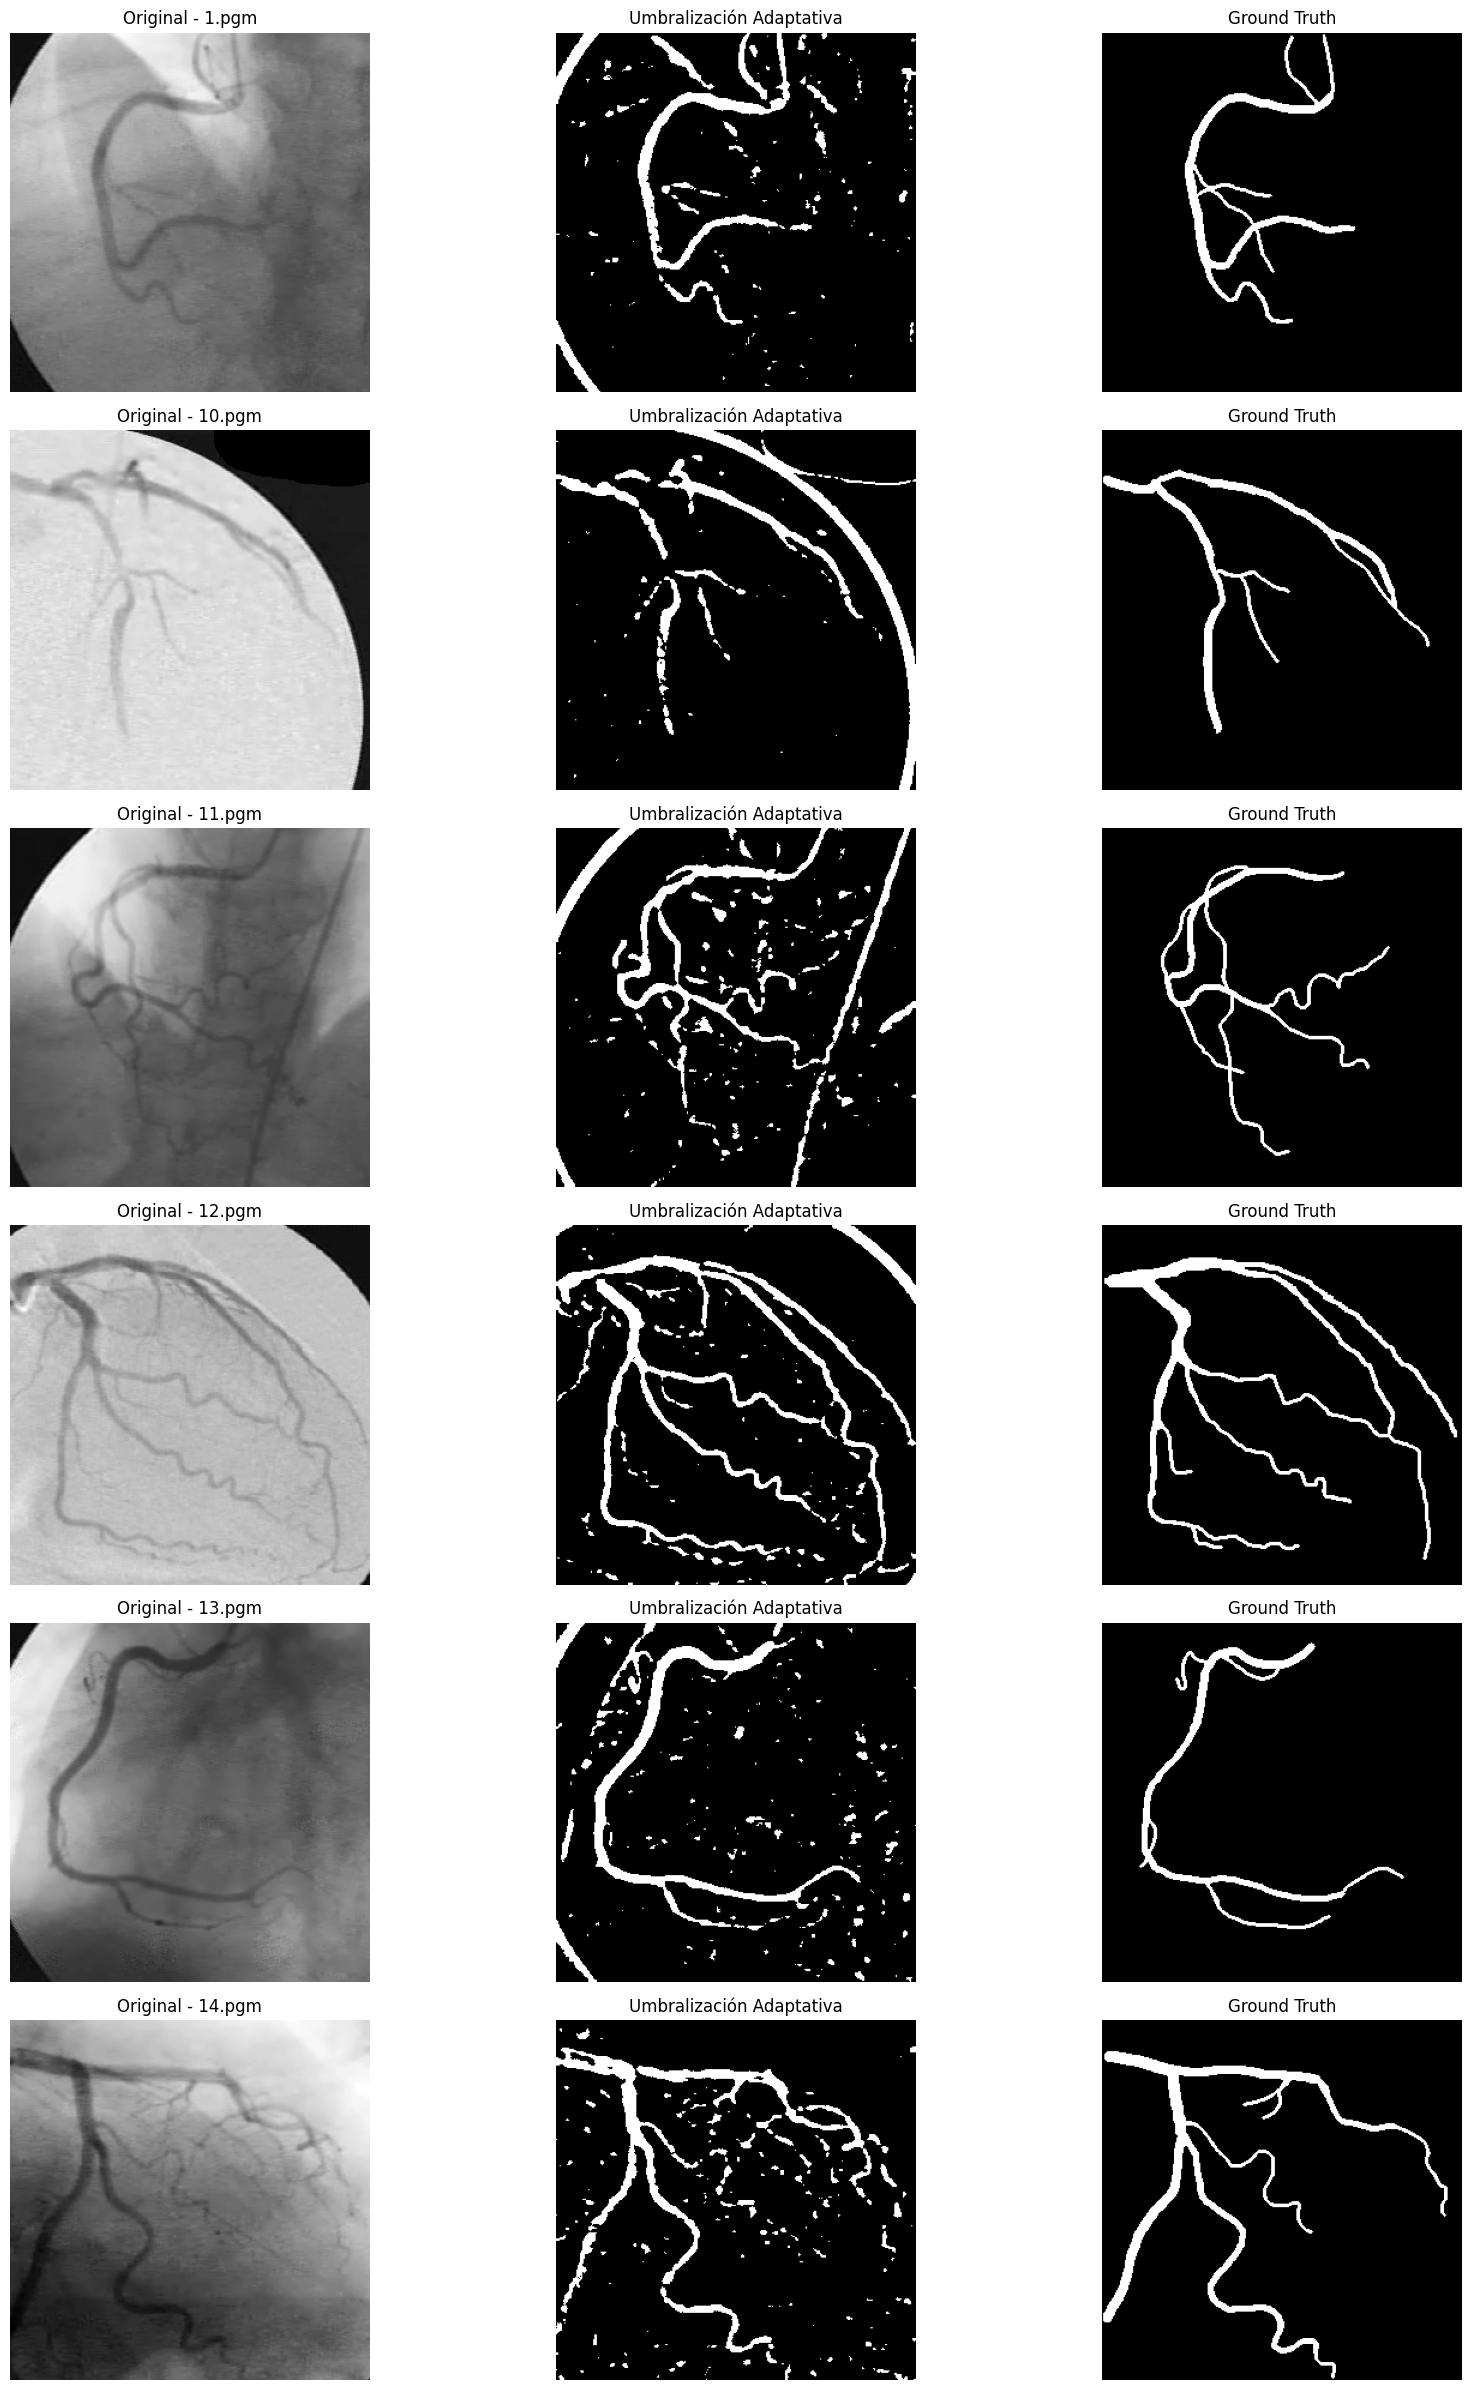

In [6]:
num_display = min(6, len(resultadosVisuales))

plt.figure(figsize=(18, 4 * num_display))

for i in range(num_display):
    filename, orig, binarized, gt = resultadosVisuales[i]
    
    plt.subplot(num_display, 3, 3*i + 1)
    plt.imshow(orig, cmap='gray')
    plt.title(f"Original - {filename}")
    plt.axis('off')
    
    plt.subplot(num_display, 3, 3*i + 2)
    plt.imshow(binarized, cmap='gray')
    plt.title("Umbralización Adaptativa")
    plt.axis('off')
    
    plt.subplot(num_display, 3, 3*i + 3)
    plt.imshow(gt, cmap='gray')
    plt.title("Ground Truth")
    plt.axis('off')
    
plt.tight_layout()
plt.show()


In [ ]:
df = pd.DataFrame(resultados)
print(df)

promedios = df.mean(numeric_only=True)
print("\nPromedios de métricas en umbralización adaptativa:")
print(promedios)

    Imagen  Accuracy    Recall  Specificity  Precision  F1 Score
0    1.pgm  0.951833  0.808516     0.958118   0.458458  0.585128
1   10.pgm  0.936333  0.700355     0.947160   0.378146  0.491119
2   11.pgm  0.919867  0.750068     0.927067   0.303660  0.432305
3   12.pgm  0.936344  0.854500     0.943391   0.565125  0.680319
4   13.pgm  0.946844  0.887989     0.949283   0.420391  0.570634
5   14.pgm  0.940667  0.731617     0.956794   0.566418  0.638505
6   15.pgm  0.952078  0.906271     0.954442   0.506581  0.649890
7   16.pgm  0.926522  0.900060     0.928070   0.422583  0.575137
8   17.pgm  0.940578  0.673635     0.953988   0.423791  0.520273
9   18.pgm  0.931367  0.681446     0.944970   0.402645  0.506196
10  19.pgm  0.968289  0.761928     0.978317   0.630681  0.690119
11   2.pgm  0.940422  0.876883     0.943570   0.434960  0.581486
12  20.pgm  0.943411  0.912465     0.945775   0.562397  0.695886
13   3.pgm  0.949000  0.874668     0.952246   0.444414  0.589372
14   4.pgm  0.950989  0.5

## Sauvola

In [8]:
from skimage.filters import threshold_sauvola
windowsSize = 31
kSauvola = 0.2
resultadosSauvola = []
resultadosVisualesSauvola = []

for imagen in imagenes:
    img = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print('Error al cargar la imagen ' + imagen)
        continue
    
    blurred = cv2.GaussianBlur(img, kernelSize, 0)
    
    sauvola_thresh = threshold_sauvola(blurred, window_size=windowsSize, k=kSauvola)
    
    sauvola_binary = (blurred < sauvola_thresh).astype(np.uint8) * 255
    
    filename = os.path.basename(imagen)
    gt_name = filename
    gt_path = os.path.join('datos', 'etiquetas', gt_name)
    gt = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
    if gt is None:
        print('Error al cargar la imagen ' + gt_path)
        continue
    
    accuracy, recall, specificity, precision, f1_score = calcularMetricas(sauvola_binary, gt)
    
    resultadosVisualesSauvola.append((filename, img, sauvola_binary, gt))
    resultadosSauvola.append({
        'Imagen': filename,
        'Accuracy': accuracy,
        'Recall': recall,
        'Specificity': specificity,
        'Precision': precision,
        'F1 Score': f1_score
    })

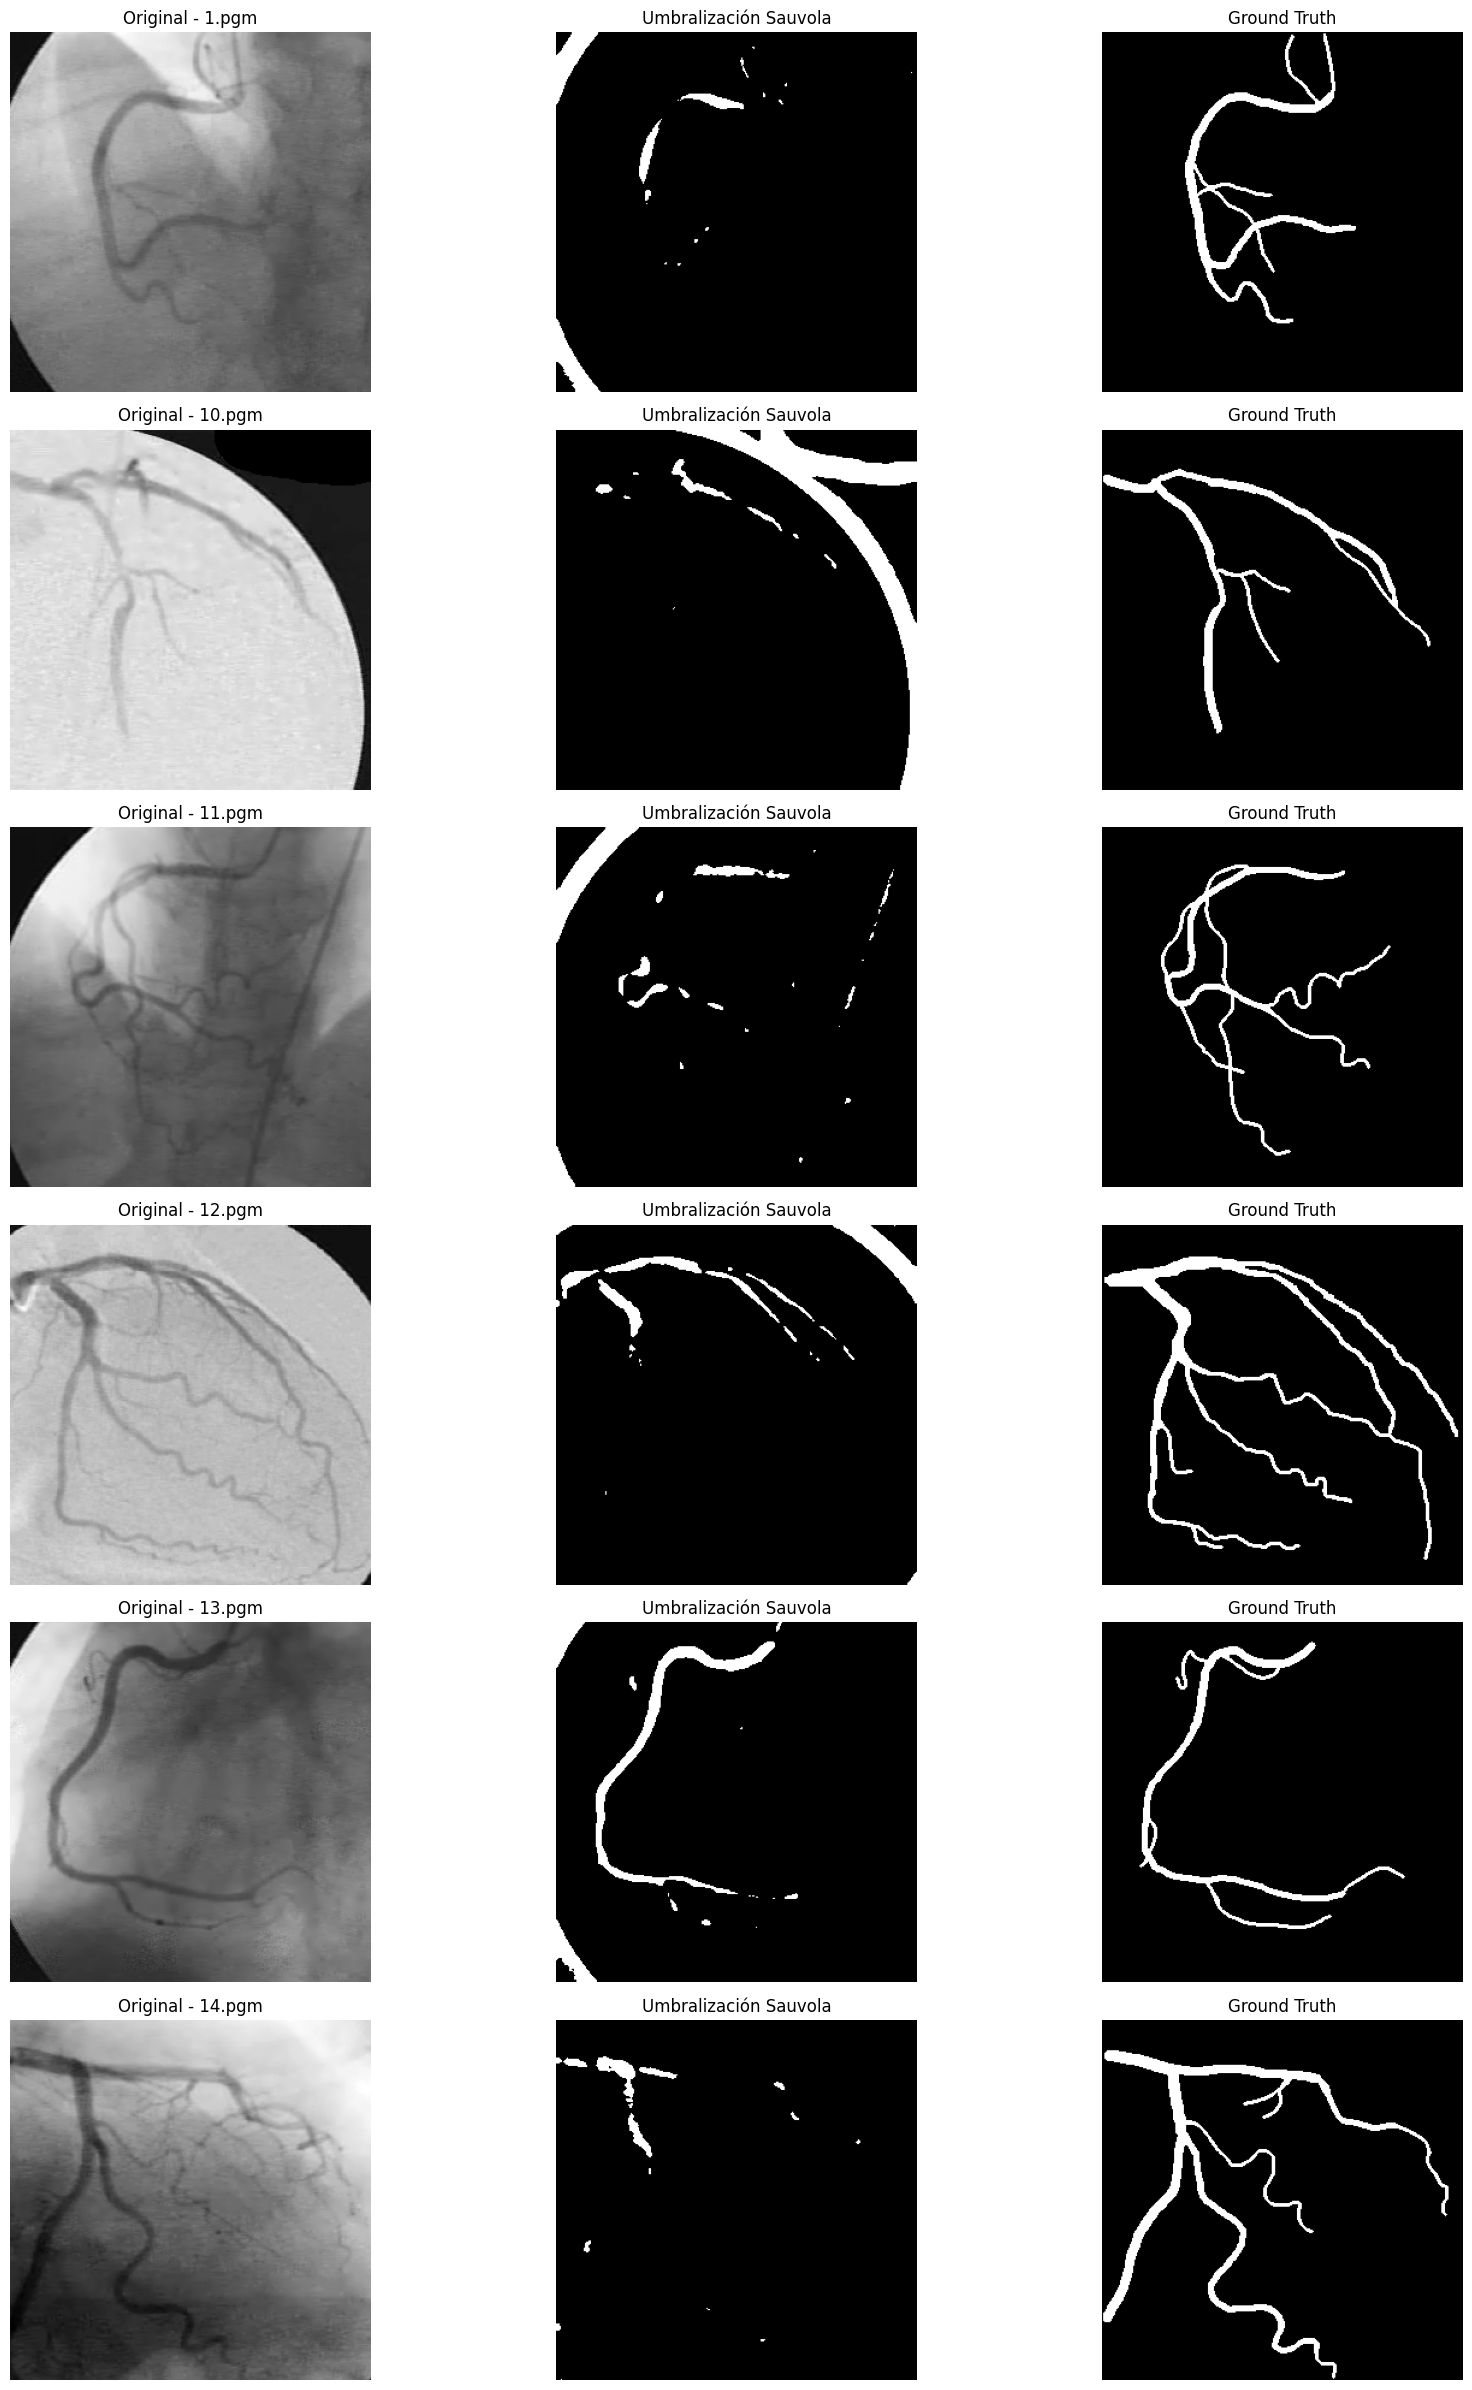

In [9]:
num_display = min(6, len(resultadosVisualesSauvola))
plt.figure(figsize=(18, 4 * num_display))

for i in range(num_display):
    filename, orig, binarized, gt = resultadosVisualesSauvola[i]
    
    # Imagen Original
    plt.subplot(num_display, 3, 3*i + 1)
    plt.imshow(orig, cmap='gray')
    plt.title(f"Original - {filename}")
    plt.axis('off')
    
    # Imagen Binarizada con Sauvola
    plt.subplot(num_display, 3, 3*i + 2)
    plt.imshow(binarized, cmap='gray')
    plt.title("Umbralización Sauvola")
    plt.axis('off')
    
    # Ground Truth
    plt.subplot(num_display, 3, 3*i + 3)
    plt.imshow(gt, cmap='gray')
    plt.title("Ground Truth")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [10]:
df_sauvola = pd.DataFrame(resultadosSauvola)
print(df_sauvola)

promedios_sauvola = df_sauvola.mean(numeric_only=True)
print("\nPromedios de métricas con Sauvola:")
print(promedios_sauvola)

    Imagen  Accuracy    Recall  Specificity  Precision  F1 Score
0    1.pgm  0.947078  0.185930     0.980457   0.294389  0.227914
1   10.pgm  0.878522  0.116008     0.913506   0.057967  0.077306
2   11.pgm  0.941667  0.215242     0.972469   0.248973  0.230882
3   12.pgm  0.923311  0.253014     0.981018   0.534340  0.343417
4   13.pgm  0.967156  0.650559     0.980271   0.577343  0.611768
5   14.pgm  0.936722  0.145672     0.997750   0.833185  0.247986
6   15.pgm  0.958622  0.430835     0.985862   0.611307  0.505445
7   16.pgm  0.965689  0.532274     0.991038   0.776474  0.631592
8   17.pgm  0.917744  0.047619     0.961456   0.058438  0.052477
9   18.pgm  0.919844  0.087817     0.965133   0.120567  0.101619
10  19.pgm  0.954656  0.021578     1.000000   1.000000  0.042244
11   2.pgm  0.939422  0.220810     0.975021   0.304545  0.256004
12  20.pgm  0.947889  0.435484     0.987024   0.719348  0.542528
13   3.pgm  0.953067  0.231280     0.984588   0.395909  0.291988
14   4.pgm  0.958500  0.0

## Otsu + preprocesamiento de iluminación

In [11]:
resultadosOtsu = []
resultadosVisualesOtsu = []

for imagen in imagenes:
    img = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print('Error al cargar la imagen ' + imagen)
        continue
    
    equalized = cv2.equalizeHist(img)
    ret, otsu = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    filename = os.path.basename(imagen)
    gtPath = os.path.join('datos', 'etiquetas', filename)
    gt = cv2.imread(gtPath, cv2.IMREAD_GRAYSCALE)
    if gt is None:
        print('Error al cargar la imagen ' + gtPath)
        continue
    
    accuracy, recall, specificity, precision, f1_score = calcularMetricas(otsu, gt)
    resultadosVisualesOtsu.append((filename, img, otsu, gt))
    resultadosOtsu.append({
        'Imagen': filename,
        'Accuracy': accuracy,
        'Recall': recall,
        'Specificity': specificity,
        'Precision': precision,
        'F1 Score': f1_score
    })

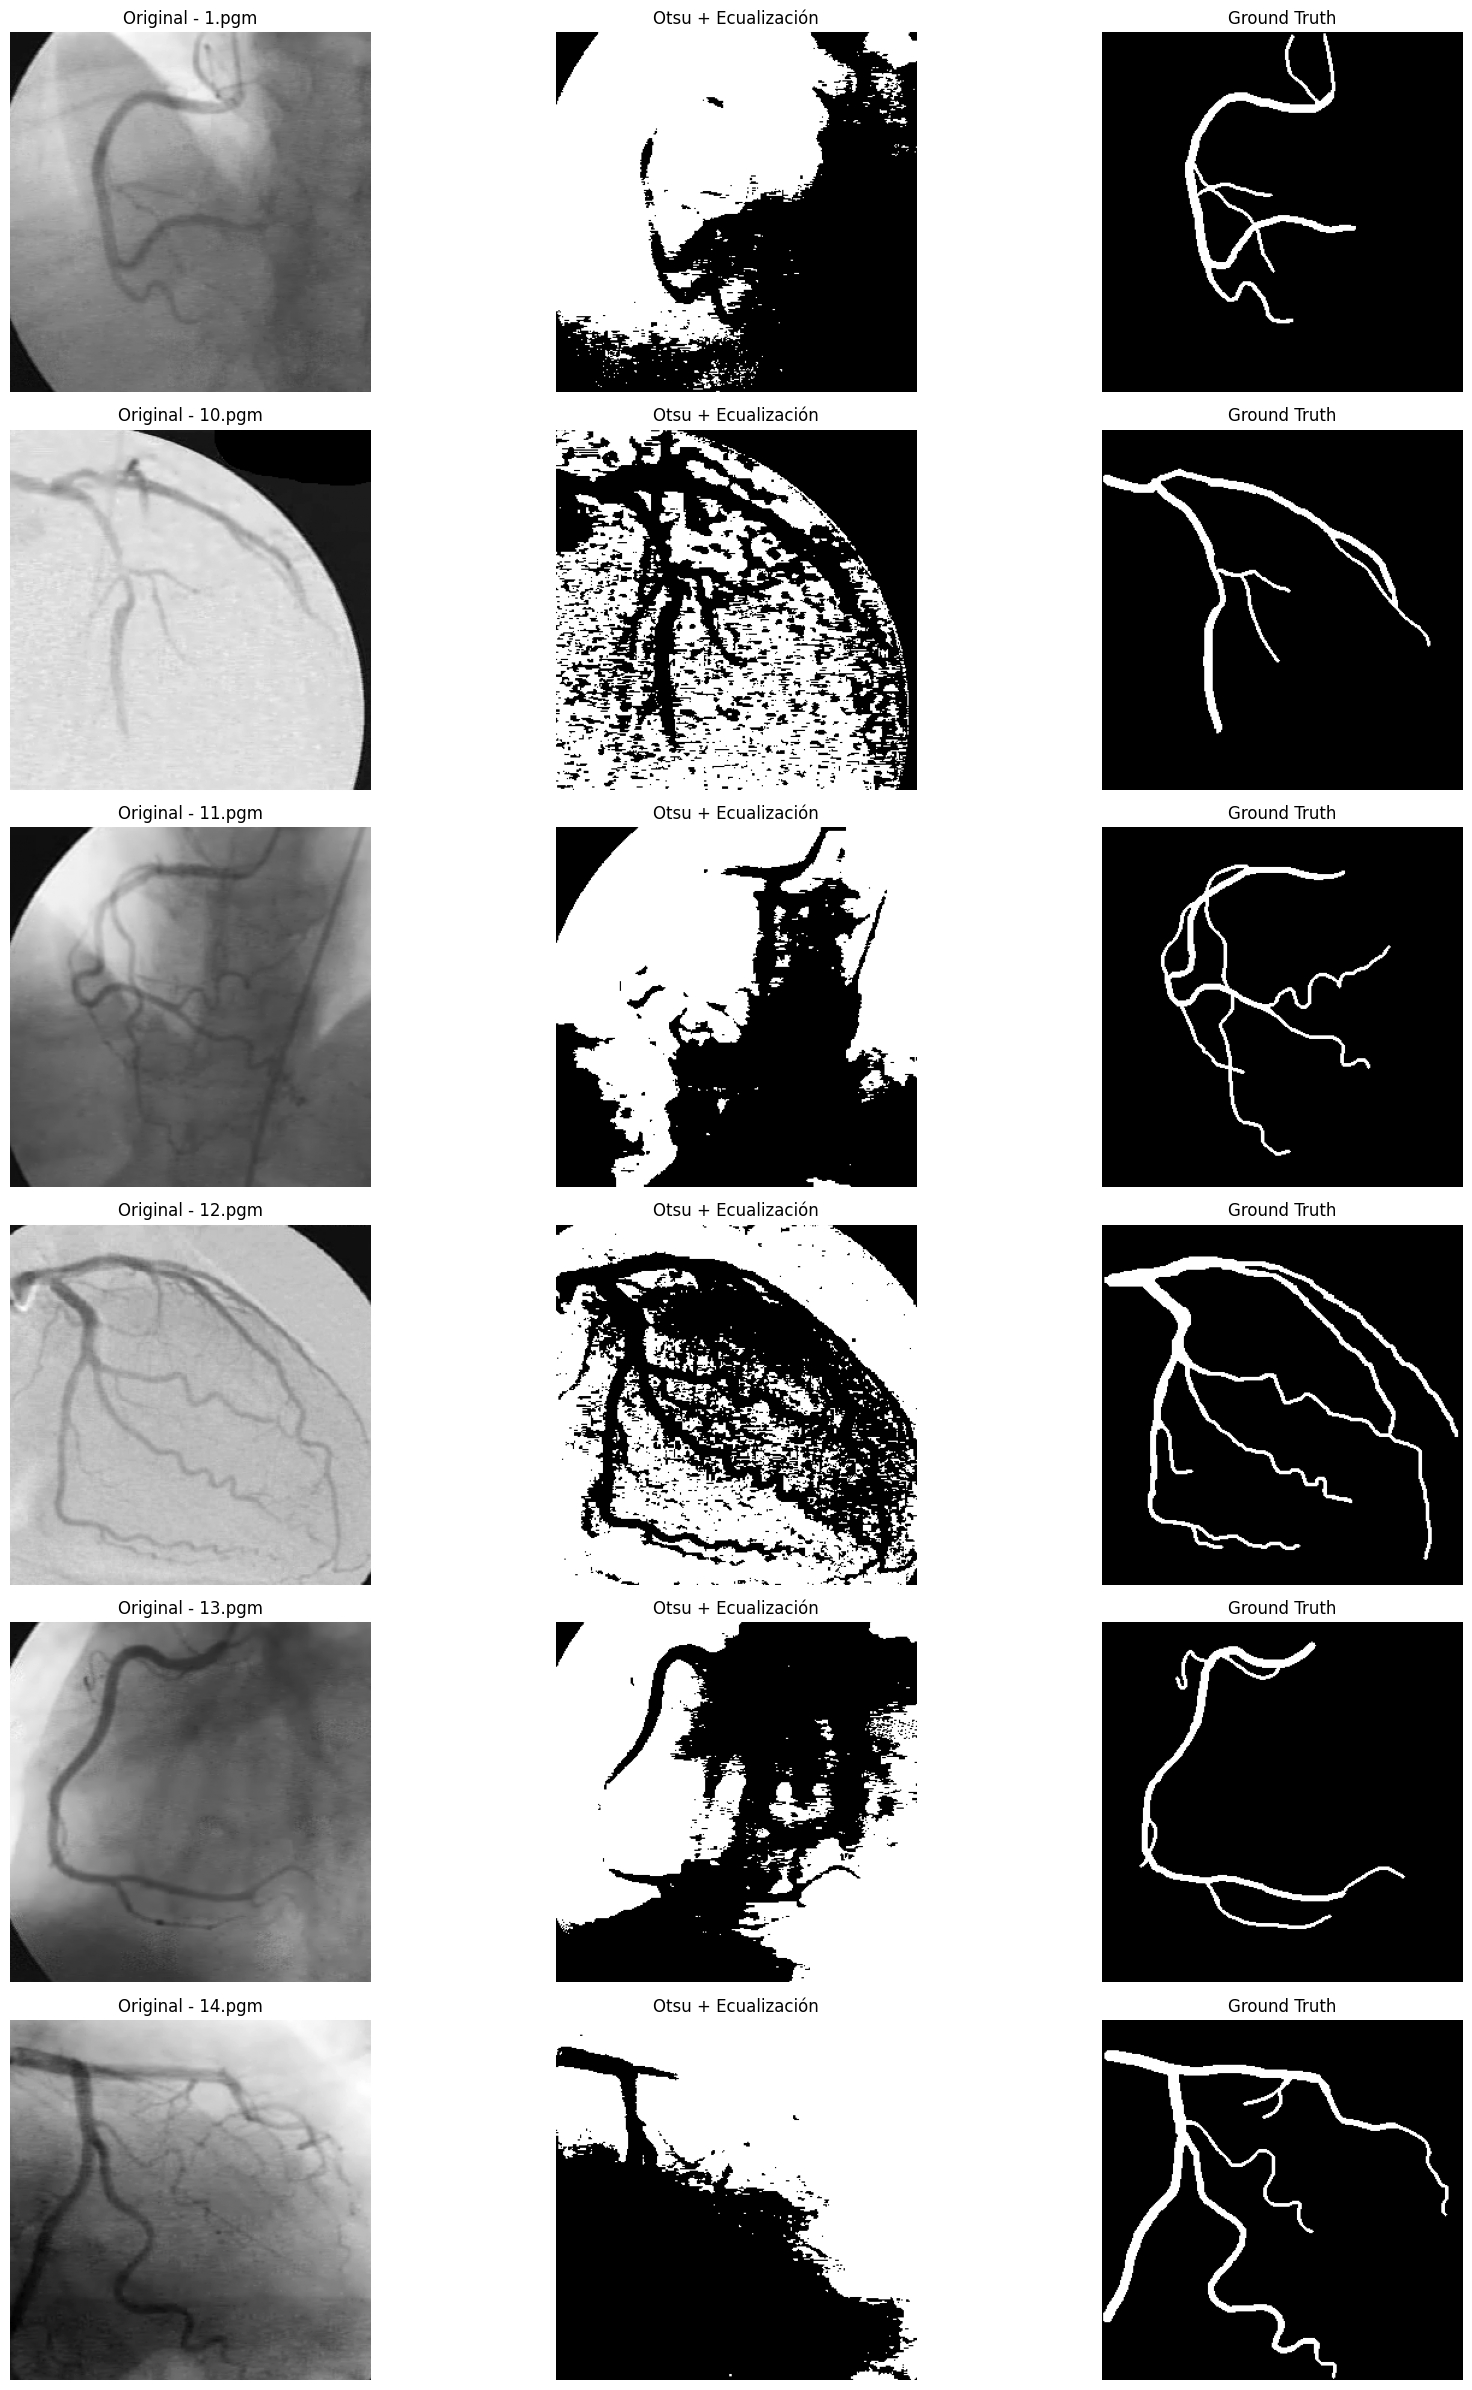

In [12]:
num_display = min(6, len(resultadosVisualesOtsu))
plt.figure(figsize=(18, 4 * num_display))

for i in range(num_display):
    filename, orig, binarized, gt = resultadosVisualesOtsu[i]
    
    plt.subplot(num_display, 3, 3*i + 1)
    plt.imshow(orig, cmap='gray')
    plt.title(f"Original - {filename}")
    plt.axis('off')
    
    plt.subplot(num_display, 3, 3*i + 2)
    plt.imshow(binarized, cmap='gray')
    plt.title("Otsu + Ecualización")
    plt.axis('off')
    
    plt.subplot(num_display, 3, 3*i + 3)
    plt.imshow(gt, cmap='gray')
    plt.title("Ground Truth")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [13]:
df_otsu = pd.DataFrame(resultadosOtsu)
print(df_otsu)

promedios_otsu = df_otsu.mean(numeric_only=True)
print("\nPromedios de métricas con Otsu + Ecualización:")
print(promedios_otsu)

    Imagen  Accuracy    Recall  Specificity  Precision  F1 Score
0    1.pgm  0.496589  0.477916     0.497408   0.040031  0.073874
1   10.pgm  0.470156  0.001773     0.491645   0.000160  0.000294
2   11.pgm  0.489544  0.515706     0.488435   0.040994  0.075950
3   12.pgm  0.378222  0.011074     0.409830   0.001613  0.002815
4   13.pgm  0.466200  0.221508     0.476336   0.017221  0.031958
5   14.pgm  0.459289  0.284673     0.472760   0.039989  0.070126
6   15.pgm  0.454556  0.001132     0.477957   0.000112  0.000204
7   16.pgm  0.483167  0.325357     0.492397   0.036134  0.065044
8   17.pgm  0.467811  0.103368     0.486119   0.010004  0.018243
9   18.pgm  0.463067  0.067585     0.484594   0.007087  0.012829
10  19.pgm  0.370689  0.000959     0.388657   0.000076  0.000141
11   2.pgm  0.486033  0.335452     0.493493   0.031766  0.058037
12  20.pgm  0.443444  0.126683     0.467637   0.017850  0.031291
13   3.pgm  0.486956  0.367499     0.492172   0.030636  0.056557
14   4.pgm  0.505744  0.4

## Filtros de Gabor